# Architectural Tradeoff Analysis (PCA)

In [34]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [75]:
# Read simulation data
df = pd.DataFrame(
    pd.read_csv(r"C:\Users\KarlO\architectural-tradeoff-analysis\Simulation data\DebuggingModel_1_09-Feb-202312-16-34.csv"))

# Scale dataframe (gets turned into ndarray which gets retransformed back to dataframe)
scaled_ndarr = preprocessing.scale(df)
scaled_df = pd.DataFrame(scaled_ndarr, columns = df.columns)

# Create correlation matrix

corr_matrix = scaled_df.corr()
corr_matrix = corr_matrix.fillna(0)
corr_matrix = corr_matrix.drop(['cost','time'])
corr_matrix = corr_matrix[['cost','time']]

[[0.93043533 0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]]


In [65]:
corr_matrix_arr = corr_matrix.to_numpy()
pca = PCA()
pca.fit(corr_matrix_arr)
pca_data = pca.transform(corr_matrix_arr)

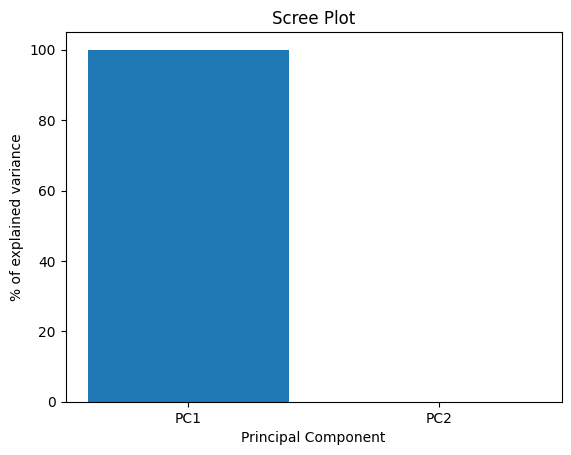

In [66]:
# Calculate percentage of variation that each PC (principal component) accounts for
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
# Create labels
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
# Plot scree plot
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('% of explained variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

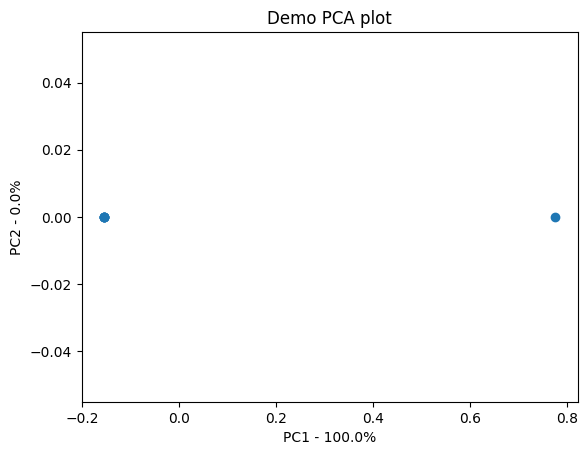

In [76]:
pca_df = pd.DataFrame(pca_data, columns=labels)

plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('Demo PCA plot')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

plt.show()